<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Introduction to AI and Data Science

Even Semester 2023/2024

Faculty of Computer Science, Universitas Indonesia

## **Lab *1*: *Data Collection & Processing***

### **Deadline: 10 February 2024, 23:55**
</center>

#### **Guidelines:**

1. Lab document *template* in .ipynb format and dataset (if needed) have been provided on SCeLe.
2. Run the code in the .ipynb document and pay close attention to what the code snippet does and its output. Answer the **asserted questions** in the given program snippet.
3. Jupyter Notebook documents that have been completed with answers are collected in the format **Lab1_NPM_Name.ipynb**. Example: Lab1_2006123456_Budi.ipynb
4. Submit these documents onto the submission slot provided on SCeLe before **10 February 2024, 23:55**. Late submission will incur a score penalty.
5. Plagiarism is not permitted in any form. As for collaboration in the form of discussion (without copying or taking other people's answers) and literature, it is still permitted by properly crediting collaborators and sources.


In [ ]:
NAME = "Muhammad Sakhran Thayyib"
NPM = "2206046790"

# **Import Dependencies**

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Scraping
from bs4 import BeautifulSoup
import requests
import urllib.parse

# **Tutorial**

## Intro to Pandas
[Pandas](https://pandas.pydata.org/) is a Python library used for data analysis. Pandas provides data structures and high-level functions to make working with structured/tabular data easier. The main data structures used in Pandas are **Series** and **DataFrame**. **Series is a 1-dimensional array** that contains data and an index. **DataFrame is a 2-dimensional array** that contains data and indexes for rows and columns.

By using the Pandas library, we can perform various operations such as:
- Loading data from various file formats like CSV, Excel, and SQL
- Selecting specific columns and rows from data
- Merging data from multiple sources
- Removing and filling missing values
- Conducting descriptive statistical calculations such as mean, median, and standard deviation

In general, Pandas is a useful library for anyone working with data and needing tools to manipulate and analyze data.

### Dataframe

A Pandas **Series** is a one-dimensional labeled array that holds data of any type, providing both the actual values and corresponding labeled index.

In [ ]:
data = [1, 2, 3]
series = pd.Series(data)
print(series)

0    1
1    2
2    3
dtype: int64


A **DataFrame** in Pandas is a two-dimensional tabular data structure with labeled axes (rows and columns), designed for handling and analyzing structured data, similar to a spreadsheet or SQL table.

1. You can make a DataFrame from a Series.

In [ ]:
df = pd.DataFrame(series, columns=["Numbers"])
df

,Numbers
0,1
1,2
2,3


2. You can also make a DataFrame with Dictionaries.

In [ ]:
food_data = [
    {"food": "Apple", "calories": 95},
    {"food": "Banana", "calories": 105},
    {"food": "Chicken Breast", "calories": 165}
]

df_food = pd.DataFrame(food_data)
df_food

,food,calories
0,Apple,95
1,Banana,105
2,Chicken Breast,165


3. You can make a DataFrame by fetching data from a link.

In [ ]:
# Creating DataFrame from a file on the internet
df_remote = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",  # URL of the file
    header=None,  # No header row
)
df_remote

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


4. You can make a DataFrame from a local file.

In [ ]:
df_local = pd.read_csv(
    "abalone.csv"  # relative path to the local CSV file
    # header=None is not used because the CSV file already includes headers
)
df_local

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Displaying a Part of DataFrame
Using the head(n) function to view the first 5 rows of a DataFrame. The parameter n can be used to specify the number of rows to display. If no value is provided, the default is 5. To see the last 5 rows of a DataFrame, the tail(n) function can be employed.

In [ ]:
df = df_local

# Displaying the first 5 rows of the DataFrame
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Displaying the first 3 rows of the DataFrame
df.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [ ]:
# Displaying the last 5 rows of the DataFrame
df.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [ ]:
# Displaying 5 random rows of the DataFrame
df.sample(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
625,F,0.525,0.405,0.160,0.6580,0.2655,0.1125,0.225,12
1323,I,0.560,0.455,0.145,0.9740,0.5470,0.1615,0.235,9
913,I,0.370,0.290,0.095,0.2490,0.1045,0.0580,0.067,6
1864,I,0.520,0.395,0.125,0.5805,0.2445,0.1460,0.165,9
2432,F,0.610,0.485,0.165,1.0870,0.4255,0.2320,0.380,11


### Displaying Information of a DataFrame

In [ ]:
# Displaying the dimensions of the DataFrame using the shape attribute.
print(f"The dimensions of the abalone dataframe are {df.shape}")
print(f"It consists of {df.shape[0]} rows and {df.shape[1]} columns")

The dimensions of the abalone dataframe are (4177, 9)
It consists of 4177 rows and 9 columns


In [ ]:
# Displaying the data types for each column using the dtypes attribute.
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [ ]:
# Displaying descriptive statistics for each column using the describe() function.
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# For a specific column
df['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [ ]:
# Counting the number of missing values for each column using the isnull().sum() function.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### Accessing Columns and Rows in a DataFrame

1. Accessing columns using square brackets:
We can access DataFrame columns similar to indexing in arrays or lists, using Square Brackets, either as a Series or a new DataFrame.

In [ ]:
# Accessing a column as a Series
col_1 = df['Length']
print(f"object type: {type(col_1)}")
col_1

object type: <class 'pandas.core.series.Series'>


0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [ ]:
# Accessing a column as a DataFrame
col_1 = df[['Length']]
print(f"object type: {type(col_1)}")
col_1

object type: <class 'pandas.core.frame.DataFrame'>


,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330
...,...
4172,0.565
4173,0.590
4174,0.600
4175,0.625


In [ ]:
# Accessing more than 1 column as a DataFrame
col_1_2 = df[['Length', 'Diameter']]
print(f"object type: {type(col_1_2)}")
col_1_2

object type: <class 'pandas.core.frame.DataFrame'>


,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
4172,0.565,0.450
4173,0.590,0.440
4174,0.600,0.475
4175,0.625,0.485


2. Accessing Columns using Dot Notation:
Dot notation can only be used to access a single column as a Series. The column must have a name (not using default numeric index). Column names should not use DataFrame object attribute names and must not contain forbidden characters in Python variable names.

In [ ]:
# Accessing a column using dot notation
col_1 = df.Length
print(f"object type: {type(col_1)}")
col_1

object type: <class 'pandas.core.series.Series'>


0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

3. Accessing Rows using loc and iloc Functions:
We can access rows (and columns) in a DataFrame using loc or iloc. loc accesses indexes based on the label of rows or columns, while iloc accesses indexes based on integer positions. loc also accepts a range inclusively.

- Accessing Rows

In [ ]:
# Accessing rows 1 to 3 using loc
df.loc[1:3]  # inclusive range

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.44,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [ ]:
# Accessing rows 0 to 3 using iloc
df.iloc[1:4] # exclusive range

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.44,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


- Accessing Columns

In [ ]:
# Accessing a column as a Series with loc
df_1 = df.loc[:, 'Length']
print("object type:", type(df_1))
df_1

object type: <class 'pandas.core.series.Series'>


0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [ ]:
# Accessing a column as a DataFrame with loc
df_2 = df.loc[:, ['Length']]
print("object type:", type(df_2))
df_2

object type: <class 'pandas.core.frame.DataFrame'>


,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330
...,...
4172,0.565
4173,0.590
4174,0.600
4175,0.625


In [ ]:
# Accessing more than 1 column with loc
df.loc[:, ['Length', 'Diameter']]

,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
4172,0.565,0.450
4173,0.590,0.440
4174,0.600,0.475
4175,0.625,0.485


In [ ]:
# Accessing a column as a Series with iloc
df_3 = df.iloc[:, 1]
print("object type:", type(df_3))
df_3

object type: <class 'pandas.core.series.Series'>


0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [ ]:
# Accessing a column as a DataFrame with iloc
df_4 = df.iloc[:, [1]]
print("object type:", type(df_4))
df_4

object type: <class 'pandas.core.frame.DataFrame'>


,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330
...,...
4172,0.565
4173,0.590
4174,0.600
4175,0.625


In [ ]:
# Accessing more than 1 column with iloc
df.iloc[:, [2, 4]]

,Diameter,Whole_weight
0,0.365,0.5140
1,0.265,0.2255
2,0.420,0.6770
3,0.365,0.5160
4,0.255,0.2050
...,...,...
4172,0.450,0.8870
4173,0.440,0.9660
4174,0.475,1.1760
4175,0.485,1.0945


- Accessing Rows and Columns

In [ ]:
# Accessing rows 5-10, Columns Length and Diameter using loc
df.loc[5:10, ['Length', 'Diameter']]

,Length,Diameter
5,0.425,0.300
6,0.530,0.415
7,0.545,0.425
8,0.475,0.370
9,0.550,0.440
10,0.525,0.380


In [ ]:
# Accessing rows 5-10, Columns Length and Diameter using iloc
df.iloc[5:11, [3, 2]]

,Height,Diameter
5,0.095,0.300
6,0.150,0.415
7,0.125,0.425
8,0.125,0.370
9,0.150,0.440
10,0.140,0.380


## Data Scraping

In this section, we're going to learn about Data Scraping

`Data scraping`, also known as web scraping, is the process of extracting information from websites or web pages. It involves using automated techniques and tools to retrieve specific data from the HTML or other structured data formats of websites. Data scraping is commonly used for various purposes such as data collection, analysis, research, and creating datasets for machine learning.

 One of Python libraries that is widely used for web scraping and parsing HTML or XML documents is called `Beautiful Soup`. It provides a convenient way to navigate and manipulate the content of web pages, making it easier to extract specific information from them. Beautiful Soup creates a parse tree from the HTML source code of a web page, allowing you to search, filter, and extract data effectively.

We'll demonstrate how to use this amazing library

The website that we're going to scrape is from the laptop price website:

https://www.laptopsdirect.co.uk/ct/laptops-and-netbooks/laptops?fts=laptops

The website is an online retail platform specializing in the sale of laptops, including various brands and models such as Lenovo and Apple MacBook Pro, offering detailed product specifications, customer reviews, price information, and purchasing options like payment plans and delivery details.

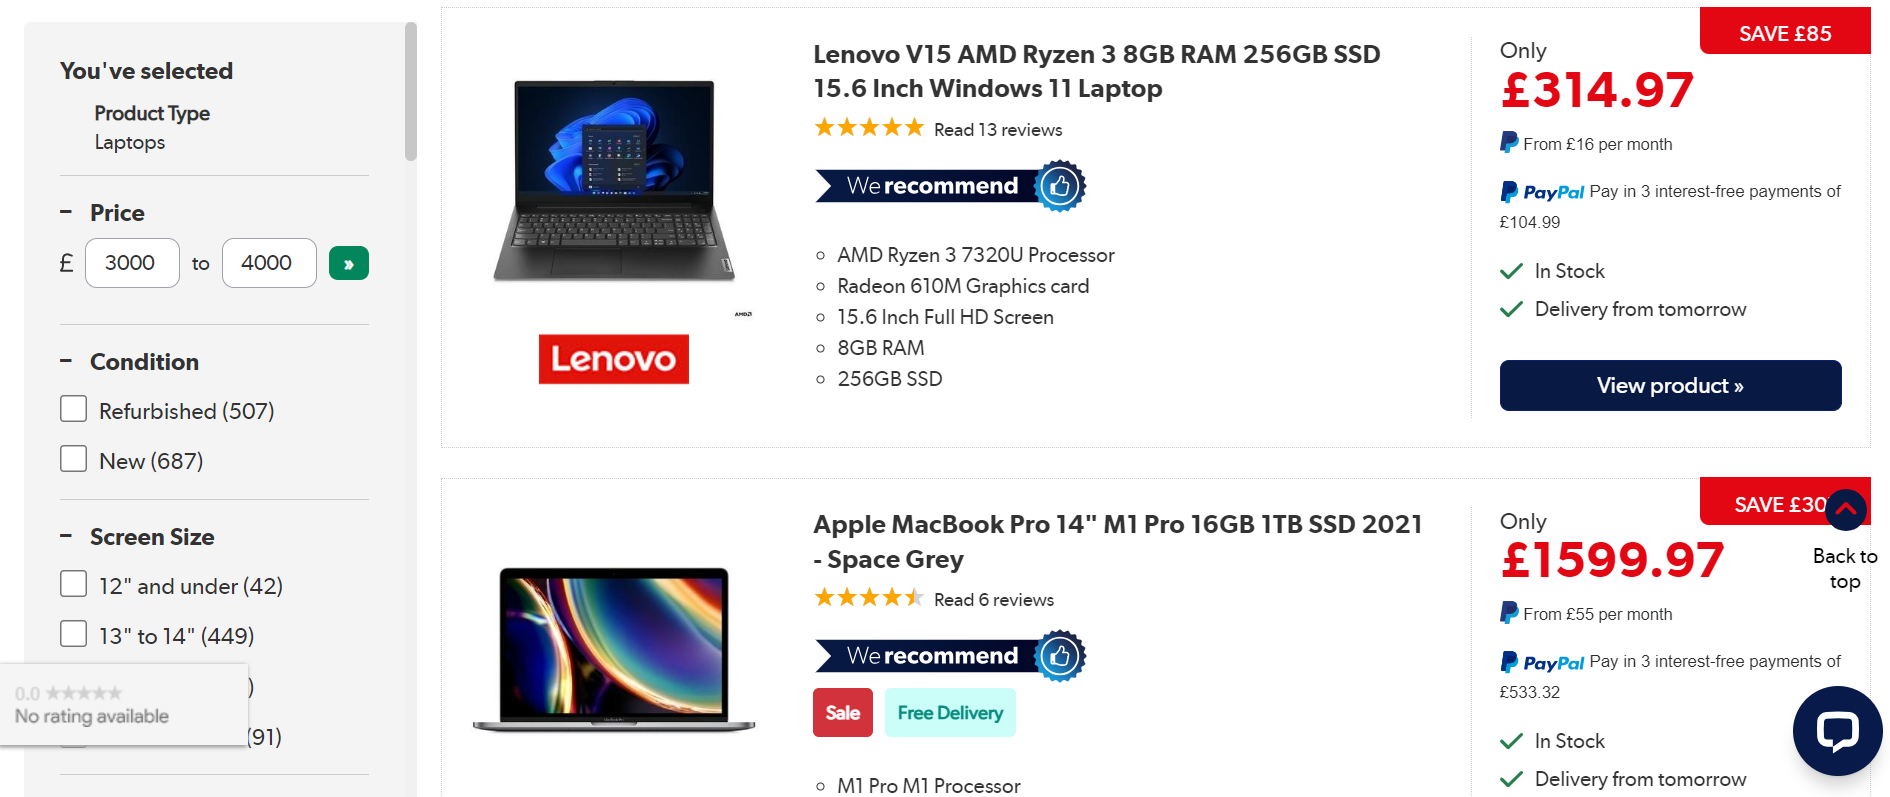

The target data for scraping from the website are:

1. **Name**: The full name of the laptop product, which includes the brand, model, and possibly the variant, such as "Lenovo V15 AMD Ryzen 3" or "Apple MacBook Pro 14" M1 Pro".

2. **Price**: The current selling price of the laptop as listed on the website, denoted in the local currency (e.g., £314.97 for the Lenovo or £1599.97 for the MacBook Pro).

3. **Product Link**: The direct URL to the product's page where a potential customer can view more details, reviews, or make a purchase.

4. **Product Details**: Key specifications and features of the laptop, such as the processor type, graphics card, screen size, RAM, and storage capacity (e.g., "AMD Ryzen 3 7320U Processor, Radeon 610M Graphics card, 15.6 Inch Full HD Screen, 8GB RAM, 256GB SSD" for the Lenovo laptop).

In [ ]:
# The URL we're going to scrape
website = 'https://www.laptopsdirect.co.uk/ct/laptops-and-netbooks/laptops?fts=laptops'

In [ ]:
# Get Request
response = requests.get(website)

Here are few explanations about the response status.

* 200 OK: The request was successful, and the server has responded with the requested data.
* 400 Bad Request: The request was malformed or invalid.
* 401 Unauthorized: Authentication is required, and the client's credentials are either missing or incorrect.
* 403 Forbidden: The client is authenticated, but it does not have permission to access the requested resource.
* 500 Internal Server Error: A generic server error occurred, indicating that the server is unable to fulfill the request.
* 502 Bad Gateway: The server, while acting as a gateway or proxy, received an invalid response from the upstream server.



In [ ]:
# Status Code
response.status_code

200

 This code initializes a BeautifulSoup object with the HTML content of a web page, making it easier to work with and extract information from the web page's structure.

In [ ]:
# Soup Object
soup = BeautifulSoup(response.content, 'html.parser')
soup


<!DOCTYPE html>

<html>
<head>
<title>Laptops | Latest Laptop Deals - Laptops Direct</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Shop the latest Laptops from big brands including; Acer, Apple, HP, Dell, MSI &amp; more. UK delivery &amp; finance available." name="description"/>
<meta content="750A7E1E7CFD645A621631B4D0D00D8F" name="msvalidate.01"/>
<meta content="fLvXhGZfG+rz6abxdEjAMrZ87rJHvBMbTwQdP7l82Oc=" name="verify-v1"/>
<meta content="5b48667176976dbb" name="y_key"/>
<meta content="8251355FA66F77FA668FFCC5B7C83573" name="msvalidate.01"/>
<link href="https://www.laptopsdirect.co.uk/ct/laptops-and-netbooks/laptops" rel="canonical"/>
<link href="https://www.laptopsdirect.co.uk/ct/laptops-and-netbooks/laptops?pageNumber=2" rel="next"/>
<meta content="Laptops | Latest Laptop Deals - Laptops Direct" property="og:title"/>
<meta content="Shop the latest Laptops from big brands including; Acer, Apple, HP, Dell, MSI &amp; more. UK delivery &amp; finance a

This code `soup.find_all` is often used in web scraping to identify and extract specific elements on a web page that share a common attribute, in this case, the `OfferBox` class. The `OfferBox` class indicates each card or item, in this case, the laptop. Thus, we can infer there are 48 laptops shown in the page.

In [ ]:
# length
results = soup.find_all('div', {'class':'OfferBox'})
len(results)

46

`results[0]` is the first OfferBox or the first laptop we're trying to investigate

In [ ]:
results[0]

<div class="OfferBox border-radius-large border-style-solid border-width-1 border-neutral-300 margin-y-1 b-row margin-x-0 position-relative">
<div class="merchTopofCentreColumn top5icon EligiblityDateTimeVisibility_301811" onload="dataLayer.push({'event':'top5IconShown'});" style="display:none; z-index: 20; position: absolute; top: 50px; left: 10px; cursor: pointer;  pointer-events: none; width: 70px;">
<img alt="Top 5" border="0" src="https://www.appliancesdirect.co.uk/images/top5-apd.png"/>
</div>
<div class="sr_image b-col-3 padding-1">
<div>
<a class="productHref_1869724" href="/lenovo-v15-amd-ryzen-3-8gb-ram-256gb-ssd-15.6-inch-windows-11-home-laptop-82yu00fvuk-home/version.asp" onclick="EnEcomProdClick('82YU00FVUK-Home', 'lenovo-v15-amd-ryzen-3-8gb-ram-256gb-ssd-15.6-inch-windows-11-home-laptop-82yu00fvuk-home/version.asp', '1');" title="Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 Inch Windows 11 Laptop">
<img alt="Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 Inch Windows 11 L

In the HTML text, there is this code

```
...
<a class="offerboxtitle" ...>Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 Inch Windows 11 Laptop</a>
...
```

In order to get the title, you can follow this code

In [ ]:
# name
results[0].find('a', {'class':'offerboxtitle'}).get_text()

'Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 Inch Windows 11 Laptop'

In the HTML text, there is this code

```
...
<span class="offerprice">
      £314.97
      ...
</span>
...
```

In order to get the price, you can follow this code

In [ ]:
# Price
results[0].find('span', {'class':'offerprice'}).get_text().strip('[\n\r ]')

'£314.97'

In the HTML text, there is this code

```
...
<a class="offerboxtitle"
  href="/lenovo-v15-amd-ryzen-3-8gb-ram-256gb-ssd-15.6-inch-windows-11-home-laptop-82yu00fvuk-home/version.asp" ...>
  Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 Inch Windows 11 Laptop
</a>
...
```

In order to get the full link, you can follow this code

In [ ]:
# Relative URL
relative_url = results[0].find('a', {'class':'offerboxtitle'}).get('href')
root_url = 'https://www.laptopsdirect.co.uk/'
url_combined = root_url + relative_url
url_combined

'https://www.laptopsdirect.co.uk//lenovo-v15-amd-ryzen-3-8gb-ram-256gb-ssd-15.6-inch-windows-11-home-laptop-82yu00fvuk-home/version.asp'

In the HTML text, there is this code

```
...
<div class="productInfo" id="productInfo_1869724">
  <ul>
    <li><span class="proddescvalue">AMD Ryzen 3 7320U</span> <span class="proddesctitle">Processor</span></li>
    <li><span class="proddescvalue">Radeon 610M</span> <span class="proddesctitle">Graphics card</span></li>
    <li><span class="proddescvalue">15.6 Inch Full HD Screen</span></li>
    <li><span class="proddescvalue">8GB</span> <span class="proddesctitle">RAM</span></li>
    <li><span class="proddescvalue">256GB</span> <span class="proddesctitle">SSD</span></li>
  </ul>
</div>
...
```

In order to get the description, you can follow this code

In [ ]:
# Product Details
results[0].find('div', {'class':'productInfo'}).get_text().strip().replace('\n',', ')

'AMD Ryzen 3 7320U Processor, Radeon 610M Graphics card, 15.6 Inch Full HD Screen, 8GB RAM, 256GB SSD'

Bring it all in

In [ ]:
product_name = []
product_price = []
relative_url = []
product_details = []

root_url = 'https://www.laptopsdirect.co.uk/'

for result in results:

    # name
    try:
        product_name.append(result.find('a', {'class':'offerboxtitle'}).get_text())
    except:
        product_name.append('n/a')

    # price
    try:
        product_price.append(result.find('span', {'class':'offerprice'}).get_text().strip('[\n\r ]'))
    except:
        product_price.append('n/a')

    # relative URL
    try:
        relative_url.append(root_url + result.find('a', {'class':'offerboxtitle'}).get('href'))
    except:
        relative_url.append('n/a')

    #product details
    try:
        product_details.append(result.find('div', {'class':'productInfo'}).get_text().strip().replace('\n',', '))
    except:
        product_details.append('n/a')

Create the dataframe from the scraped data

In [ ]:
product_overview = pd.DataFrame({'Name': product_name, 'Price':product_price,
                                 'Link': url_combined, 'Details': product_details})
product_overview

,Name,Price,Link,Details
0,Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 ...,£314.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 3 7320U Processor, Radeon 610M Graph..."
1,"Apple MacBook Pro 14"" M1 Pro 16GB 1TB SSD 2021...",£1599.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"M1 Pro M1 Processor, M1 Pro 16-Core Graphics c..."
2,HP ProBook 635 Aero G8 AMD Ryzen 5 8GB RAM 256...,£419.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 5 5600U Processor, Radeon Graphics G..."
3,HP 255 G9 AMD Ryzen 7 16GB RAM 512GB SSD 15.6 ...,£574.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 7 5825U Processor, 15.6 Inch Full HD..."
4,Razer Blade 15 Intel Core i7 16GB 1TB RTX 3070...,£1469.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Core i7-12800H 14 Core Processor, GeForc..."
5,Refurbished Samsung Galaxy Go Intel Celeron N4...,£119.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Celeron N4500 Processor, 14 Inch 1366 x ..."
6,Lenovo IdeaPad 3 Gaming Laptop AMD Ryzen 5 8GB...,£999.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 5 5600H Processor, GeForce RTX 3060 ..."
7,Refurbished Lenovo ThinkPad T460 Core i5 6th g...,£199.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Core i5 Processor, 14 Inch 1366 x 768 Sc..."
8,MSI Katana 17 B13VEK-015UK Intel Core i7 16GB ...,£1099.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Core i7 13620H Processor, GeForce RTX 40..."
9,Lenovo IdeaPad Gaming 3 Intel Core i5 8GB 256G...,£649.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Core i5 11320H Processor, GeForce GTX 16..."


And you're done !!

## Data Cleaning and Transformation

You might have heard about "Garbage In, Garbage Out" before. This means that if you have a bad data quality, you are also going to get bad results from any data initiative you try to put in place (read [here](https://amplifiuk.com/knowledge-base/blogs/garbage-in-garbage-out-cleaning-your-data-and-your-supply-chain) for more information). In order to prevent that, we have to clean and transform the data to a proper form before doing the next process.

### Null Values Handling

In [ ]:
# we can use isnull().sum() to find the amount of null values
# in each column
product_overview.isnull().sum()

Name       0
Price      0
Link       0
Details    0
dtype: int64

Based on the result, we can conclude that there is no null values in the dataset.

### Duplicate Rows Handling

In [ ]:
# we can use duplicated().sum() to find the amount of duplicate rows
product_overview.duplicated().sum()

0

Based on the result, there is no duplicate rows in the dataset.

### Converting Datatypes

In [ ]:
product_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     46 non-null     object
 1   Price    46 non-null     object
 2   Link     46 non-null     object
 3   Details  46 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


We can see that `Price` should be a numerical-valued column, so we have to convert the column to numerical datatype.

In [ ]:
# we can use to_numeric() method to convert column to a numerical-valued column
# note that we have to replace the '£' sign at the front by replacing it with empty string
product_overview['Price'] = pd.to_numeric(product_overview['Price'].str.replace('£', ''))
product_overview.head()

,Name,Price,Link,Details
0,Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 ...,314.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 3 7320U Processor, Radeon 610M Graph..."
1,"Apple MacBook Pro 14"" M1 Pro 16GB 1TB SSD 2021...",1599.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"M1 Pro M1 Processor, M1 Pro 16-Core Graphics c..."
2,HP ProBook 635 Aero G8 AMD Ryzen 5 8GB RAM 256...,419.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 5 5600U Processor, Radeon Graphics G..."
3,HP 255 G9 AMD Ryzen 7 16GB RAM 512GB SSD 15.6 ...,574.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 7 5825U Processor, 15.6 Inch Full HD..."
4,Razer Blade 15 Intel Core i7 16GB 1TB RTX 3070...,1469.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Core i7-12800H 14 Core Processor, GeForc..."


In [ ]:
product_overview.dtypes

Name        object
Price      float64
Link        object
Details     object
dtype: object

We can see that the datatype of `Price` has changed to `float64`.

### Extracting Values from Column

Column `Details` has a lot of information regarding the specification of the laptop. Specifically, it consists of several information which separated by commas. We want to extract it and put it into different columns. In this case, we want to extract the information about the processor of the laptop and we want to put that into a new column called `Processor`.



In [ ]:
# remember on how to use split() in Python
product_overview['Processor'] = product_overview['Details'].str.split(',').str[0]
product_overview.head()

,Name,Price,Link,Details,Processor
0,Lenovo V15 AMD Ryzen 3 8GB RAM 256GB SSD 15.6 ...,314.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 3 7320U Processor, Radeon 610M Graph...",AMD Ryzen 3 7320U Processor
1,"Apple MacBook Pro 14"" M1 Pro 16GB 1TB SSD 2021...",1599.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"M1 Pro M1 Processor, M1 Pro 16-Core Graphics c...",M1 Pro M1 Processor
2,HP ProBook 635 Aero G8 AMD Ryzen 5 8GB RAM 256...,419.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 5 5600U Processor, Radeon Graphics G...",AMD Ryzen 5 5600U Processor
3,HP 255 G9 AMD Ryzen 7 16GB RAM 512GB SSD 15.6 ...,574.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"AMD Ryzen 7 5825U Processor, 15.6 Inch Full HD...",AMD Ryzen 7 5825U Processor
4,Razer Blade 15 Intel Core i7 16GB 1TB RTX 3070...,1469.97,https://www.laptopsdirect.co.uk//lenovo-v15-am...,"Intel Core i7-12800H 14 Core Processor, GeForc...",Intel Core i7-12800H 14 Core Processor


We have successfully created a new column which contains information regarding the processor of the laptop.

The data cleaning and transformation process is not limited to these activities only. In fact, it depends on the quality of the data. If the quality of the data is good enough, you may not have to do a lot of cleaning and transformation activities.

# **Assignment Car Dataset**

## Dependencies

In [ ]:
!pip install pandasql lxml requests beautifulsoup4 --q

  Preparing metadata (setup.py) ... done


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Intro to Pandas

### Question 1: Pandas part 1
Open dataset netflix_userbase.csv as a dataframe and display the first 3 rows of the dataframe.

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)


netflixUserbaseCSV = pd.read_csv("netflix_userbase.csv")
print(netflixUserbaseCSV.head(3))

### Question 2: Pandas part 2
Create a new DataFrame consisting of Subscription Type, Monthly Revenue, Join Date, Last Payment Date, and Country for the first 10 rows from the DataFrame in question 1. Display the dimensions/size and the first 3 rows of the new DataFrame!

In [8]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)


netflixUserbaseCSV = pd.read_csv("netflix_userbase.csv")
first10rows = netflixUserbaseCSV.head(10)

newDataFrameProto = pd.DataFrame(first10rows)
newDataFrame = newDataFrameProto[["Subscription Type", "Monthly Revenue", "Join Date", "Last Payment Date", "Country"]]

print("Dimensions/Size of new DataFrame:", newDataFrame.shape)
print("First 3 rows of the new DataFrame:")
print(newDataFrame.head(3))

Dimensions/Size of new DataFrame: (10, 5)
First 3 rows of the new DataFrame:
  Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0             Basic               10  15-01-22          10-06-23   
1           Premium               15  05-09-21          22-06-23   
2          Standard               12  28-02-23          27-06-23   

          Country  
0   United States  
1          Canada  
2  United Kingdom  


### Question 3: Pandas part 3
Display the number of unique countries in the dataset. Display how many times each country appears in the dataset.

In [17]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

netflixUserbaseCSV = pd.read_csv("netflix_userbase.csv")
countryOnlyProto = pd.DataFrame(netflixUserbaseCSV)

uniqueCountriesQuantity = countryOnlyProto[["Country"]].nunique()
countryCounter = countryOnlyProto[["Country"]].value_counts()

print("There are ", uniqueCountriesQuantity, " unique countries in the dataset")
print("How many times each country appears in the dataset: ", countryCounter)



There are  Country    10
dtype: int64  unique countries in the dataset
How many times each country appears in the dataset:  Country       
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: count, dtype: int64


## Data Collection

In this section, you're given a task to collect data by scraping through this website using BeautifulSoup

https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip=

This following image is showing the data that you'll scrape

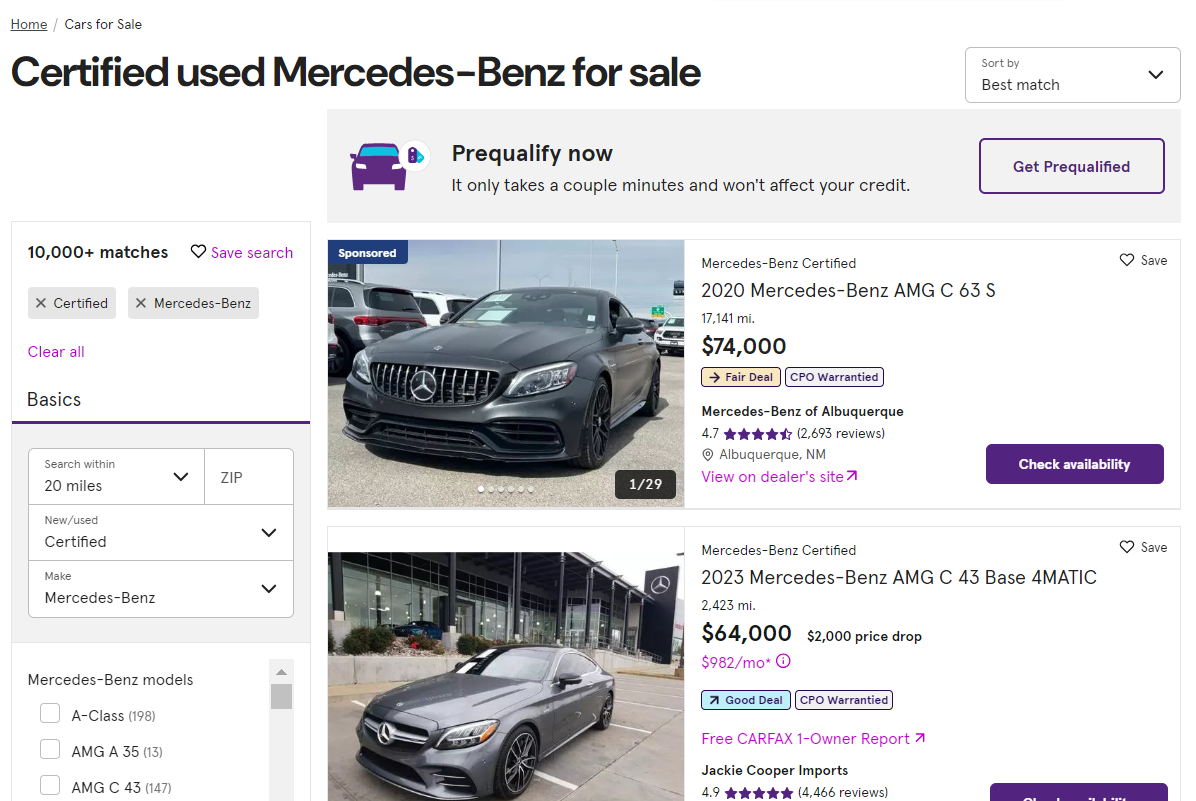

The website appears to be a marketplace for certified pre-owned Mercedes-Benz vehicles, offering users the ability to search, view listings, check availability, and obtain vehicle history reports for a variety of Mercedes-Benz models being sold by dealers.

In this webiste, we're trying to scrape these features:

1. Name: refers to the specific model and variant of the Mercedes-Benz vehicle listed for sale, such as "2020 Mercedes-Benz AMG C 63 S".

2. Mileage: the total number of miles the vehicle has been driven, which is an important factor in assessing the vehicle's condition and value. (e.g. 17,141 mi.)

3. Dealer Name: The name of the dealership or seller offering the vehicle, which could be used for further inquiries or to assess the seller's credibility. (e.g. Mercedes-Benz of Albuquerque)

4. Rating: A numerical score typically on a scale (for example, 1 to 5), reflecting customers' reviews and satisfaction with the dealer's service. (e.g. 4.7)

5. Rating Count: The number of individual reviews or ratings that have been submitted for the dealer, indicating the breadth of customer feedback. (e.g. (2,693 reviews))

6. Price: The selling price of the vehicle, which is a crucial piece of information for potential buyers to make purchasing decisions. (e.g. $74,000)

7. Model: the brand or manufacturer of the vehicle being listed for sale. (e.g. Mercedes Benz)

Notes: The brands aren't limited to Mercedes Benz. It also includes several brands such as

* Mercedes Benz
  
  https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip=

* Audi
  
  https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=audi&models%5B%5D=&list_price_max=&maximum_distance=20&zip=

* etc.


You just need to adjust the parameter `makes%5B%5D` to change the car models.

### Question 1: Web Scraping part 1


Create a Python script to scrape data from a car sales website, specifically for certified pre-owned Mercedes-Benz vehicles. The script should extract the following details: model name and variant, mileage, dealer name, dealer rating, number of reviews for the dealer, and the listed price. Use the website

Website:

https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip=

Remember! The `makes%5B%5D=mercedes_benz` parameter adjust the car models. In this question, we're going to use `mercedes_benz` model.

In [ ]:
website = 'https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip='
# TODO: Scrape Code
response = requests.get(website)
soup = BeautifulSoup(response.content, 'html.parser')
results = soup.find_all('div', {'class': 'vehicle-card'})


# One of the scraped result
example = results[0]

In [ ]:
# In this code below, the expected output format is also provided. Note: the output could be different each time
# TODO: Replace the None with the appropriate BeautifulSoup selector

example.find('h2', {'class': 'title'}).get_text()
# > 2020 Mercedes-Benz AMG C 63 S

example.find('div', {'class': 'mileage'}).get_text()
# > 17,141 mi.

example.find('div', {'class': 'dealer-name'}).get_text().strip('[\n]')
# > Mercedes-Benz of Albuquerque

example.find('span',{'class': 'sds-rating__count'}).get_text()
# > 4.7

example.find('span',{'class': 'sds-rating__link'} ).get_text()
# > (2,693 reviews)

example.find('span', {'class': 'primary-price'}).get_text()
# > $74,000

### Question 2: Web Scraping part 2

Design a Python web scraping task that targets a car sales website, with the objective of collecting detailed information about certified pre-owned Mercedes-Benz vehicles. The script should iterate over search results and capture the model name, mileage, dealer name, customer rating, review count, and the price of each vehicle. Ensure that the script handles exceptions gracefully, providing 'n/a' for any data points that are not available or missing. The extracted data should be stored in corresponding lists for each attribute.

Expected dataframe:

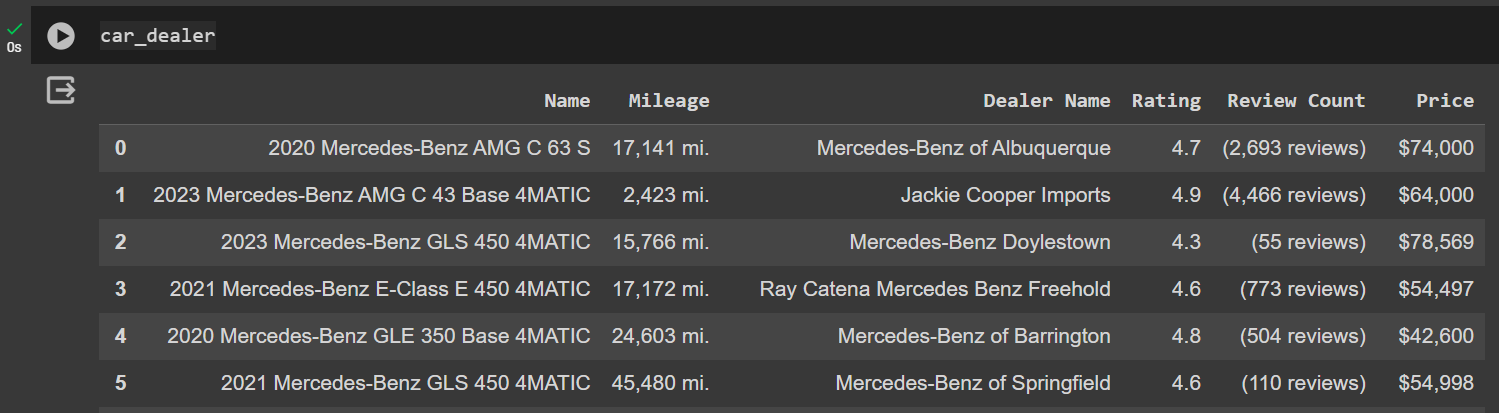

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Scraping
from bs4 import BeautifulSoup
import requests
import urllib.parse

website = "https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip="

response = requests.get(website)
soupProto = BeautifulSoup(response.content, 'html.parser')
soup = soupProto.find_all('div', {'class': 'vehicle-card'})

name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

print("CAR NAME:")

for i in soup:
    print(i.find('h2', {'class': 'title'}).get_text())
    name.append(i.find('h2', {'class': 'title'}).get_text())

print(len(name))

print("=====================================================")
print("MILEAGE:")

for i in soup:
    print(i.find('div', {'class': 'mileage'}).get_text())
    mileage.append(i.find('div', {'class': 'mileage'}).get_text())

print(mileage)

print("=====================================================")

print("DEALER NAME:")

for i in soup:
    print(i.find('div', {'class': 'dealer-name'}).get_text().strip('[\n]'))
    dealer_name.append(i.find('div', {'class': 'dealer-name'}).get_text().strip('[\n]'))

print(dealer_name)

print("=====================================================")

print("RATING:")

for i in soup:
    print(i.find('span',{'class': 'sds-rating__count'}).get_text())
    rating.append(i.find('span', {'class': 'primary-price'}).get_text())

print(rating)

print("=====================================================")

print("NUMBER OF RATINGS:")

for i in soup:
    print(i.find('span',{'class': 'sds-rating__link'} ).get_text())
    review_count.append(i.find('span', {'class': 'primary-price'}).get_text())

print(review_count)

print("=====================================================")

print("PRICE: ")

for i in soup:
    print(i.find('span', {'class': 'primary-price'}).get_text())
    price.append(i.find('span', {'class': 'primary-price'}).get_text())

print(price)



print("=====================================================")

carDealerDF = pd.DataFrame({'Name':name , 'Mileage':mileage, 'Dealer Name': dealer_name, 'Rating': rating, 'Review Count': review_count, 'Price': price})

print(carDealerDF)


> Answer Here

### Question 3: Web Scraping part 3

Here is the adjusted website URL that will be used for this task

URL: https://www.cars.com/shopping/results/?page=1&dealer_id=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=20&mileage_max=&sort=best_match_desc&stock_type=cpo&year_max=&year_min=&zip=

This task is pretty similar with the previous task. However, you need to scrape with these following requirements:
* Scrape 5 different car models: `mercedes_benz`, `audi`, `bmw`, `porsche`, `toyota` (Hint: adjust the `makes` param)
* For every model, retrieve 42 data (Hint: adjust the `page` param, by default 1 page consist of 21 cars)

Expected result:

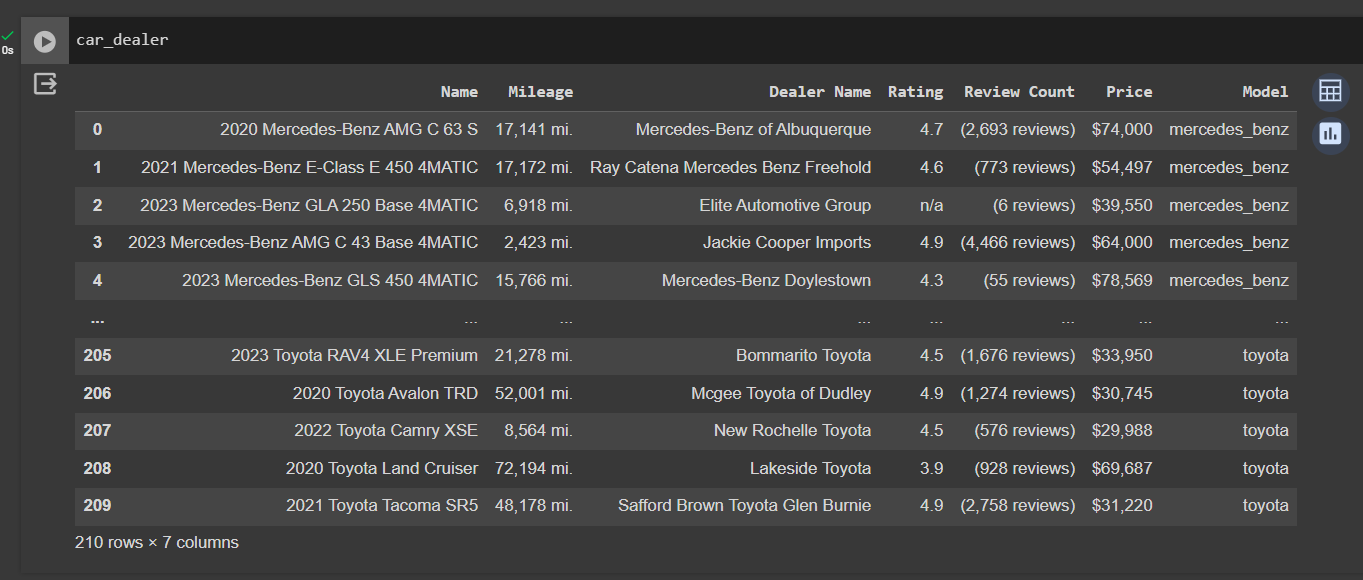

Don't forget to show the dataset shape

In [ ]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price,Model
0,2021 Mercedes-Benz AMG GT 63 4-Door,"11,016 mi.",Mercedes-Benz of Wilmington,4.2,"(1,797 reviews)","$119,900",mercedes_benz
1,2020 Mercedes-Benz AMG GT 63 S 4-Door,"4,496 mi.",Park Place Motorcars Fort Worth,4.4,"(1,067 reviews)","$128,795",mercedes_benz
2,2020 Mercedes-Benz AMG GT 63 S 4-Door,"23,767 mi.",Park Place Motorcars Dallas,4.2,"(1,808 reviews)","$115,896",mercedes_benz
3,2019 Mercedes-Benz C-Class C 300,"41,702 mi.",Mercedes-Benz of Charlottesville,4.8,(109 reviews),"$25,549",mercedes_benz
4,2020 Mercedes-Benz C-Class C 300 4MATIC,"20,261 mi.",Mercedes-Benz of Knoxville,4.6,(343 reviews),"$36,789",mercedes_benz
...,...,...,...,...,...,...,...
203,2019 Toyota Mirai Base,"25,937 mi.",Roseville Toyota,4.2,"(3,965 reviews)","$15,999",toyota
204,2019 Toyota Highlander XLE,"64,944 mi.",Phil Meador Toyota,n/a,(396 reviews),"$31,825",toyota
205,2021 Toyota Corolla Hybrid LE,"17,921 mi.",Elko Motor Company,n/a,(103 reviews),"$22,499",toyota
206,2021 Toyota Venza XLE,"55,322 mi.",Panama City Toyota,4.7,"(2,381 reviews)","$29,938",toyota


In [19]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Scraping
from bs4 import BeautifulSoup
import requests
import urllib.parse

carModelsTarget = ['mercedes_benz', 'audi', 'bmw', 'porsche', 'toyota']

name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []
modelName = []

def functionMegaSuperCool(soupZ, carBrand):
    #Car Name
    for i in soupZ:
        try:
            name.append(i.find('h2', {'class': 'title'}).get_text())
        except:
            print('n/a')
            name.append('n/a')
    
    #Mileage
    for i in soupZ:
        try:
            mileage.append(i.find('div', {'class': 'mileage'}).get_text())
        except:
            print('n/a')
            mileage.append('n/a')
    
    #Dealer Name
    for i in soupZ:
        try:
            dealer_name.append(i.find('div', {'class': 'dealer-name'}).get_text().strip('[\n]'))
        except:
            print('n/a')
            dealer_name.append('n/a')
    
    #Rating
    for i in soupZ:
        try:
            rating.append(i.find('span', {'class': 'primary-price'}).get_text())
        except:
            print('n/a')
            rating.append('n/a')
    
    #Review Count
    for i in soupZ:
        try:
            review_count.append(i.find('span', {'class': 'primary-price'}).get_text())
        except:
            review_count.append('n/a')

    #Price
    for i in soupZ:
        try:
            price.append(i.find('span', {'class': 'primary-price'}).get_text())
        except:
            price.append('n/a')

    #Brand
    for i in soupZ:
        modelName.append(carBrand)

for model in carModelsTarget:
    for pageNumber in range(1,3):
        website = f"https://www.cars.com/shopping/results/?page={pageNumber}&dealer_id=&list_price_max=&list_price_min=&makes%5B%5D={model}&maximum_distance=20&mileage_max=&sort=best_match_desc&stock_type=cpo&year_max=&year_min=&zip="
        response = requests.get(website)
        soupProto = BeautifulSoup(response.content, 'html.parser')
        soup = soupProto.find_all('div', {'class': 'vehicle-card'})
        functionMegaSuperCool(soup, model)



carDealerDF= pd.DataFrame({'Name':name , 'Mileage':mileage, 'Dealer Name': dealer_name, 'Rating': rating, 'Review Count': review_count, 'Price': price, 'Model': modelName})

print(carDealerDF)

                                         Name     Mileage  \
0     2023 Mercedes-Benz G-Class G 550 4MATIC   9,735 mi.   
1     2020 Mercedes-Benz S-Class S 450 4MATIC  29,005 mi.   
2        2019 Mercedes-Benz AMG E 63 S 4MATIC  56,906 mi.   
3     2021 Mercedes-Benz E-Class E 450 4MATIC   9,490 mi.   
4           2021 Mercedes-Benz AMG GT 43 Base  36,896 mi.   
..                                        ...         ...   
205                    2021 Toyota Tacoma SR5  40,364 mi.   
206                2024 Toyota RAV4 Prime XSE     869 mi.   
207               2021 Toyota 4Runner Limited  34,228 mi.   
208  2023 Toyota 4Runner TRD Off Road Premium  23,879 mi.   
209              2023 Toyota RAV4 XLE Premium  21,278 mi.   

                        Dealer Name    Rating Review Count     Price  \
0      Mercedes-Benz of Albuquerque  $165,889     $165,889  $165,889   
1            Benzel-Busch Motor Car   $54,621      $54,621   $54,621   
2       Mercedes-Benz of Georgetown   $62,996      

## Data Cleaning and Transformation

You will work on the `car_dealer` dataframe for the next process.

In [ ]:
car_dealer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          208 non-null    object
 1   Mileage       208 non-null    object
 2   Dealer Name   208 non-null    object
 3   Rating        208 non-null    object
 4   Review Count  208 non-null    object
 5   Price         208 non-null    object
 6   Model         208 non-null    object
dtypes: object(7)
memory usage: 11.5+ KB


### Question 1: Duplicate Rows Handling

In [ ]:
# TODO: check whether duplicate rows exist in the dataset or not
dupeCheck = car_dealer.duplicated().sum()
print(dupeCheck)

If there are duplicate rows, handle by removing them. You may skip this part if there is no duplicate rows in the dataset.

In [ ]:
# TODO: show duplicate rows
car_dealer.duplicated()

In [ ]:
# TODO: remove the duplicated rows
car_dealer.drop_duplicates()

In [ ]:
# TODO: show the shape of dataframe after removing those rows
car_dealer.shape()

### Question 2: Converting Datatypes

Mention all columns that should be converted into numerical-valued columns.

In [ ]:

integer_columns = car_dealer.select_dtypes(include='int').columns
numericColumns = ['Mileage', 'Review Count', 'Price', 'Rating']


Convert those columns into numerical-valued columns. You may want to use `to_numeric()` or other techniques to convert datatypes of columns.

In [ ]:
# TODO: convert to numeric

numericColumns = ['Mileage', 'Review Count', 'Price', 'Rating']
for col in numericColumns:
    car_dealer[col] = pd.to_numeric(car_dealer[col].replace('[^0-9.]', '', regex=True))


### Question 3: Null Values Handling

Check if null values exist in the dataset or not.

In [ ]:
# TODO: find the amount of null values for each column
car_dealer.isnull().sum()

Which column has the largest amount of null values?



> Answer: 
Rating



Mention and explain 3 different ways to handle missing values.



> Answer: 
Removing the row/column directly using .dropna
Filling it in with a predetermined value using .fillna
Leave it as empty string, or 0




Pick one of the techniques you have mentioned before and apply it to the dataset. Explain the reason why you choose that technique.

In [ ]:
# TODO: handle missing values
# TODO: handle missing values
# Removing rows with any null values
df.dropna(axis=0, inplace=True)

# Removing columns with any null values
df.dropna(axis=1, inplace=True)





> Answer:



### Question 4: Extracting Values from Column

The `Name` column contains 3 important information: year, brand, and type. For example, look at this image below.

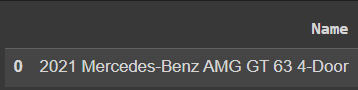



*   Year: 2021
*   Brand: Mercedes-Benz
*   Type: AMG GT 63 4-Door



Separate the information into three new columns: `Year`, `Brand`, and `Type`. You may delete the `Name` column after separating the content into these columns. The expected output should look like this:
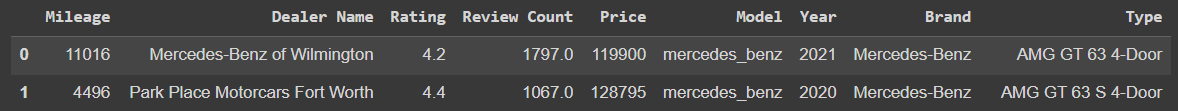

In [ ]:
#Assuming dataFrame name is still car_dealer


for index, row in car_dealer.iterrows():
    name_parts = row['Name'].split()
    
    year = name_parts[0]
    brand = ' '.join(name_parts[1:name_parts.index('AMG')]) # Assuming 'AMG' is always present
    car_type = ' '.join(name_parts[name_parts.index('AMG'):])
    
    car_dealer.at[index, 'Year'] = year
    car_dealer.at[index, 'Brand'] = brand
    car_dealer.at[index, 'Type'] = car_type

car_dealer.drop(columns=['Name'], inplace=True)
print(car_dealer)



### Question 5: Additional Process

Can you spot something redundant? 😀

Hint: Look at the columns, can you spot redundant columns?

In [ ]:
# TODO: handle this problem, which process should you apply?
#Model and Brand are redundant.
car_dealer.drop(columns=['Model'], inplace=True)
car_dealer.drop(columns=['Brand'], inplace=True)

